In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['character-deaths.csv', 'battles.csv', 'character-predictions.csv']


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
battles = pd.read_csv("../input/battles.csv")
ch_predictions = pd.read_csv("../input/character-predictions.csv")
ch_deaths = pd.read_csv("../input/character-deaths.csv")

In [8]:
ch_predictions.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


**1. Analysing Characters**

Text(0,0.5,'Count')

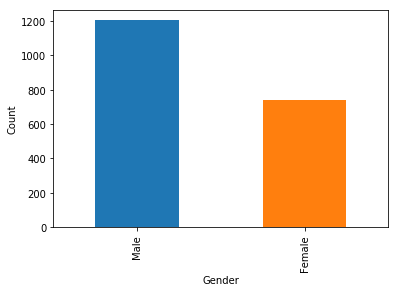

In [21]:
# Male and female characters 
#gender_df = ch_predictions["male"].value_counts().plot(kind='bar')
ch_predictions.loc[ch_predictions.male ==1, 'Gender'] = 'Male'
ch_predictions.loc[ch_predictions.male ==0, 'Gender'] = 'Female'
gender_df = ch_predictions["Gender"].value_counts().plot(kind='bar')
gender_df.set_xlabel("Gender")
gender_df.set_ylabel("Count")


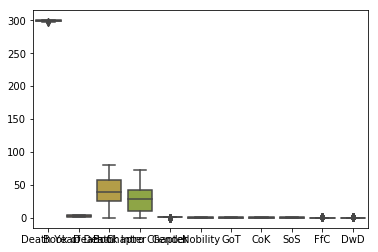

In [43]:
#Number of character deaths
deaths = ch_deaths.dropna(axis=0, how='any')
#histogram
#deaths.hist()
#boxplot
sns.boxplot(data = deaths)

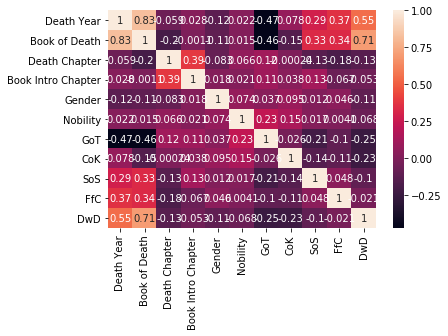

In [44]:
deaths.corr()
sns.heatmap(deaths.corr(),annot=True)

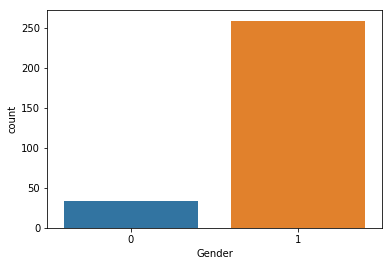

In [32]:
#Number of Gender detahs 1- Male, 0 - Female - Which gender has most deaths?
sns.countplot(x='Gender', data=deaths)

**2. Analyzing Deaths**

In [45]:
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
10,Aggar,House Greyjoy,299.0,2.0,56.0,50.0,1,0,0,1,0,0,0
12,Alan of Rosby,Night's Watch,300.0,5.0,4.0,18.0,1,1,0,1,1,0,1


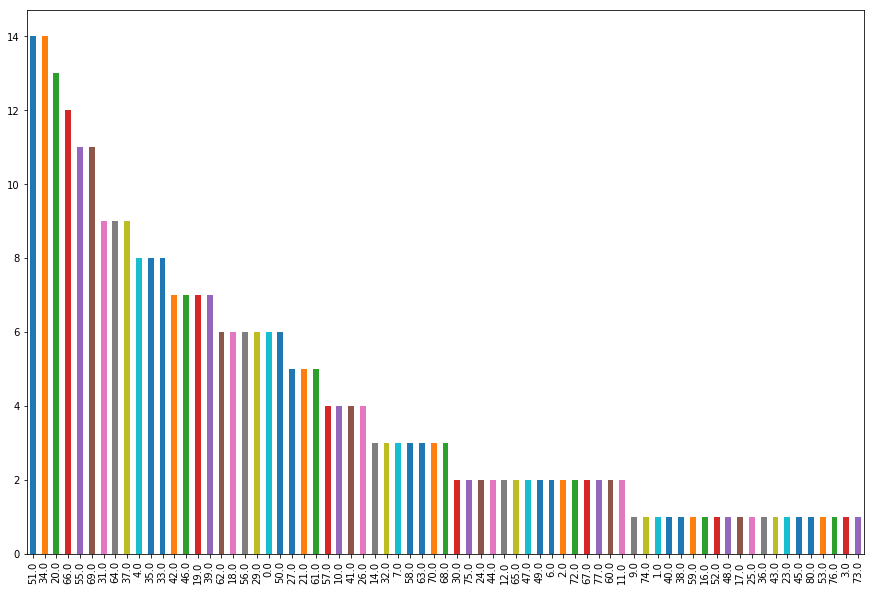

In [36]:
# Chapters with deaths and the count of number of deaths
plt.figure(figsize = (15,10))
deaths["Death Chapter"].value_counts().plot(kind = 'bar')

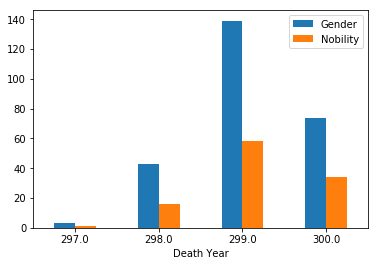

In [47]:

deaths.groupby('Death Year').sum()[['Gender','Nobility']].plot.bar(rot=0)

<Figure size 1080x720 with 0 Axes>

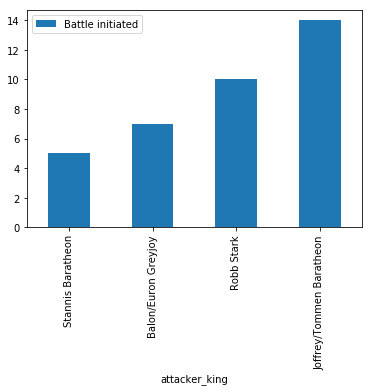

In [56]:
#Who initiated battles 
plt.figure(figsize= (15,10))
attack = pd.DataFrame(battles.groupby("attacker_king").size().sort_values())
attack = attack.rename(columns={0:'Battle initiated'})
attack.plot(kind='bar')

In [57]:
#out of the initiated battles, who has most win ratio
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


<Figure size 1080x720 with 0 Axes>

 **3. Analyzing Win/Loss ratio**

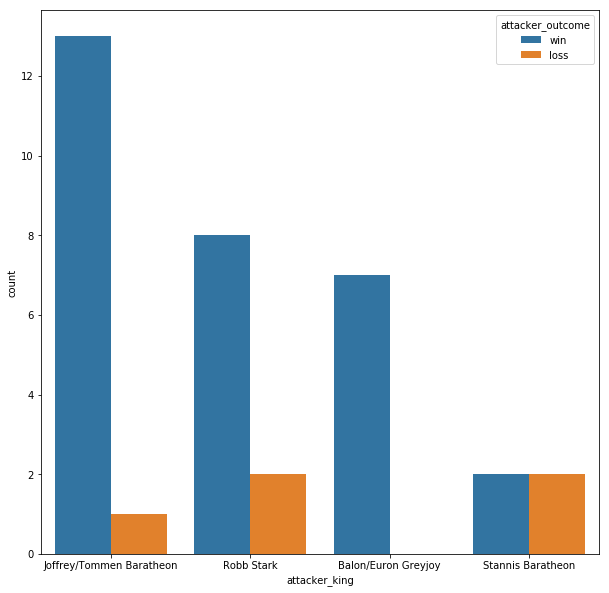

In [60]:
plt.figure(figsize=(10,10))
sns.countplot(x='attacker_king', hue = 'attacker_outcome', data = battles)
#Joffrey/Tommen Baratheon, they attack the most and they have a pretty high win ratio

In [79]:
#Which battle type has most wins
battles.groupby(["attacker_outcome","battle_type"]).size()

attacker_outcome  battle_type   
loss              pitched battle     4
                  siege              1
win               ambush            10
                  pitched battle    10
                  razing             2
                  siege             10
dtype: int64

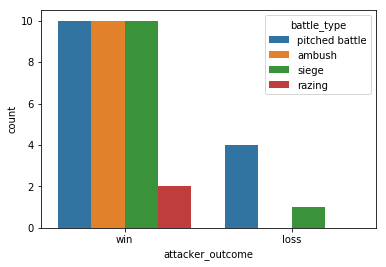

In [78]:
sns.countplot(x='attacker_outcome', hue= 'battle_type', data = battles)

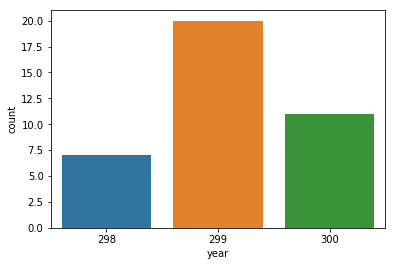

In [81]:
#Which year did most battles occur?
sns.countplot(x='year', data = battles) # 299 year has most battles

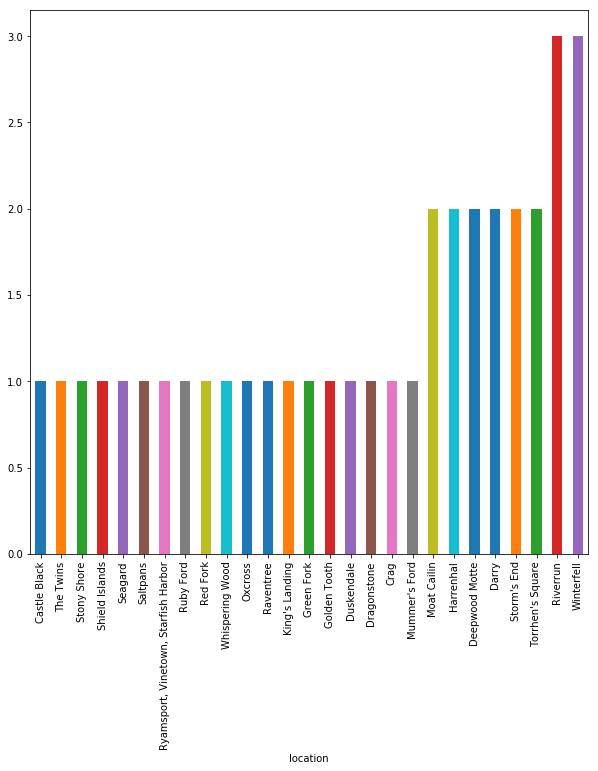

In [85]:
#Which location did most battles happen?
plt.figure(figsize = (10,10))
battles.groupby("location").size().sort_values().plot(kind='bar')